## **Setup library Gensim in training model Word2Vec**

In [1]:
!pip install gensim

   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   --- ------------------------------------ 1.8/24.0 MB 12.6 MB/s eta 0:00:02
   ---------- ----------------------------- 6.0/24.0 MB 18.4 MB/s eta 0:00:01
   ----------------- ---------------------- 10.5/24.0 MB 19.2 MB/s eta 0:00:01
   ------------------------- -------------- 15.5/24.0 MB 19.8 MB/s eta 0:00:01
   --------------------------------- ------ 20.2/24.0 MB 20.6 MB/s eta 0:00:01
   -------------------------------------- - 23.1/24.0 MB 19.7 MB/s eta 0:00:01
   ---------------------------------------- 24.0/24.0 MB 18.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/46.2 MB ? eta -:--:--
   --- ------------------------------------ 3.7/46.2 MB 19.8 MB/s eta 0:00:03
   ------ --------------------------------- 7.6/46.2 MB 19.6 MB/s eta 0:00:02
   ---------- ----------------------------- 12.3/46.2 MB 20.3 MB/s eta 0:00:02
   --------------- ------------------------ 17.6/46.2 MB 21.3 MB/s eta 0:0

  You can safely remove it manually.
  You can safely remove it manually.


Import necessary libraries

In [2]:
try:
    import os
except ImportError:
    !pip install os
    import os

try:
    import re
except ImportError:
    !pip install re
    import re

try:
    import pandas as pd
except ImportError:
    !pip install pandas
    import pandas as pd

try:
    import string
except ImportError:
    !pip install string
    import string

try:
    from gensim.models import Word2Vec
except ImportError:
    !pip install gensim
    from gensim.models import Word2Vec

try:
    import nltk
except ImportError:
    !pip install nltk
    import nltk

try:
    from nltk.corpus import stopwords
except ImportError:
    !pip install nltk
    from nltk.corpus import stopwords

try:
    from tqdm import tqdm
except ImportError:
    !pip install tqdm
    from tqdm import tqdm

# Download NLTK data
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
from utils.helper_function import *

Download dataset

In [13]:
URLs = {
    "https://docs.google.com/spreadsheets/d/1o_iC2FYF1azE6Wrf_OS7LsjEGQOgUn8v/edit?usp=drive_link&ouid=106195316964367283586&rtpof=true&sd=true": "datasets/Corona_NLP_train.xlsx",
    "https://docs.google.com/spreadsheets/d/1m2KXEyYYUE2ak_XGS3N1SbkoL6gD_DGd/edit?usp=sharing&ouid=106195316964367283586&rtpof=true&sd=true": "datasets/Corona_NLP_test.xlsx"
}

for url, path in URLs.items():
    if not os.path.exists(path):
        download_data(url, path)

train_data = load_data("datasets/Corona_NLP_train.xlsx").iloc[:2000]

In [14]:
train_data

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,2020-03-16,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,2020-03-16,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...
1995,5794,50746,"Amman, Hashemite Kingdom of Jo",2020-03-17,I went to the grocery store today to find out ...,Neutral
1996,5795,50747,deep in cognitive dissonance,2020-03-17,"Is this world war two, stiff upper lip in reac...",Extremely Negative
1997,5796,50748,"Boise, ID",2020-03-17,Never thought I would be waiting in line to ge...,Neutral
1998,5797,50749,"#Budapest, Nederland",2020-03-17,Visibly less people in s center No signs of pa...,Negative


In [15]:
train_data = train_data["OriginalTweet"].to_list()
# train_data = "\n".join(train_data)

stopwords_list=stopwords.words('english')

## **Data preprocessing**

In [16]:
def clean_data(w):
    w = w.lower()
    w = re.sub(r"'s\b","", w)
    w = re.sub("[^a-zA-Z]", " ", w)
    words = w.split()
    clean_words = [word for word in words if (word not in stopwords_list) and len(word) > 2]
    return " ".join(clean_words)


def get_inp(list_sent):
    sent=list(map(clean_data, list_sent))
    sent=list(map(lambda x: x.split(" "), sent))
    return sent

# print(train_data[:1000])
inp_data=get_inp(train_data)
print(inp_data[:5])

[['menyrbie', 'phil', 'gahan', 'chrisitv', 'https', 'ifz', 'fan', 'https', 'ghgfzcc', 'https', 'nlzdxno'], ['advice', 'talk', 'neighbours', 'family', 'exchange', 'phone', 'numbers', 'create', 'contact', 'list', 'phone', 'numbers', 'neighbours', 'schools', 'employer', 'chemist', 'set', 'online', 'shopping', 'accounts', 'poss', 'adequate', 'supplies', 'regular', 'meds', 'order'], ['coronavirus', 'australia', 'woolworths', 'give', 'elderly', 'disabled', 'dedicated', 'shopping', 'hours', 'amid', 'covid', 'outbreak', 'https', 'binca'], ['food', 'stock', 'one', 'empty', 'please', 'panic', 'enough', 'food', 'everyone', 'take', 'need', 'stay', 'calm', 'stay', 'safe', 'covid', 'france', 'covid', 'covid', 'coronavirus', 'confinement', 'confinementotal', 'confinementgeneral', 'https', 'zrlg'], ['ready', 'supermarket', 'covid', 'outbreak', 'paranoid', 'food', 'stock', 'litteraly', 'empty', 'coronavirus', 'serious', 'thing', 'please', 'panic', 'causes', 'shortage', 'coronavirusfrance', 'restezchezv

## **Train model**

In [19]:
# Skipgram model
model = Word2Vec(inp_data, min_count = 1, max_vocab_size= 256, window = 5, sg = 1)
model.build_vocab(inp_data, update=True)

model.train(inp_data, total_examples=model.corpus_count, epochs=1000)
model.wv.save('checkpoints/word2vec_skipgram.bin')


# CBOW model
model = Word2Vec(inp_data, min_count = 1, max_vocab_size = 256, window = 5, sg = 0)
model.build_vocab(inp_data, update=True)

model.train(inp_data, total_examples=model.corpus_count, epochs=1000)
model.wv.save('checkpoints/word2vec_CBOW.bin')


After training model, save model to file

In [20]:
import gensim
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec
from scipy.spatial import distance
path = 'checkpoints/word2vec_CBOW.bin'
model = gensim.models.KeyedVectors.load(path)

In [25]:
print(model.key_to_index)

{'covid': 0, 'https': 1, 'coronavirus': 2, 'food': 3, 'store': 4, 'grocery': 5, 'people': 6, 'supermarket': 7, 'panic': 8, 'shopping': 9, 'online': 10, 'consumer': 11, 'need': 12, 'stock': 13, 'retail': 14, 'please': 15, 'buying': 16, 'buy': 17, 'get': 18, 'selfish': 19, 'much': 20, 'would': 21, 'think': 22, 'hell': 23, 'bulk': 24, 'earth': 25, 'btat': 26, 'pigs': 27, 'accurate': 28, 'let': 29, 'due': 30, 'everyone': 31, 'next': 32, 'went': 33, 'sanitizers': 34, 'centred': 35, 'affordable': 36, 'deyvbcay': 37, 'craze': 38, 'rise': 39, 'closures': 40, 'kued': 41, 'prices': 42, 'highly': 43, 'consequences': 44, 'services': 45, 'providing': 46, 'amp': 47, 'precaution': 48, 'every': 49, 'following': 50, 'stockmarket': 51, 'stockmarketcrash': 52, 'mall': 53, 'meanwhile': 54, 'prepare': 55, 'something': 56, 'ready': 57, 'kahahahh': 58, 'ymwbgr': 59, 'hey': 60, 'nice': 61, 'workers': 62, 'coronaclout': 63, 'stayhomechallenge': 64, 'shower': 65, 'thoughts': 66, 'seeing': 67, 'movevan': 68, 'se

In [26]:
with open("datasets/vocab.txt", "w", encoding="utf-8") as f:
    for x in model.key_to_index.keys():
        f.write(x + "\n")

Test

In [27]:
model.most_similar(positive=['covid'], topn=10)

[('coronavirus', 0.5899369120597839),
 ('https', 0.5842939615249634),
 ('people', 0.438638836145401),
 ('amp', 0.3786044418811798),
 ('stock', 0.36995163559913635),
 ('supermarket', 0.3574128746986389),
 ('one', 0.3155726194381714),
 ('food', 0.3102433383464813),
 ('online', 0.2746305763721466),
 ('like', 0.27410629391670227)]

In [30]:
word_0 = "coronavirus"
word_1 = "covid"
word_2 = "grocery"

word_0_eb = model[word_0]
word_1_eb = model[word_1]
word_2_eb = model[word_2]

dst_0_1 = distance.euclidean(word_0_eb, word_1_eb)
dst_1_2 = distance.euclidean(word_1_eb, word_2_eb)
dst_2_0 = distance.euclidean(word_2_eb, word_0_eb)

print("OUTPUT DISTANCE")
print("0 vs 1: ", dst_0_1)
print("1 vs 2: ", dst_1_2)
print("2 vs 0: ", dst_2_0)

OUTPUT DISTANCE
0 vs 1:  4.5306525230407715
1 vs 2:  8.76383113861084
2 vs 0:  7.986009120941162


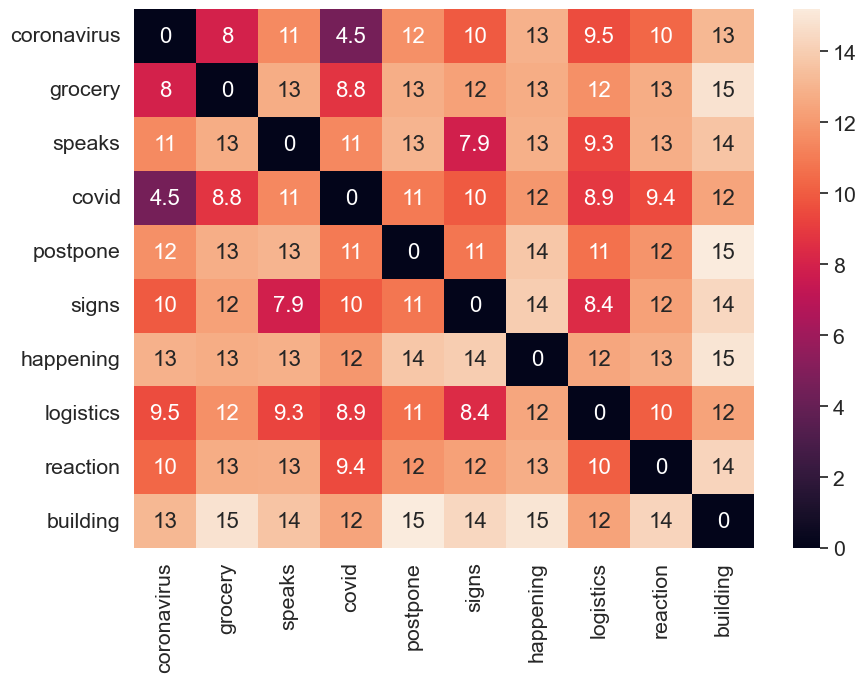

In [33]:
from scipy.spatial import distance_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

list_words = ["coronavirus", "grocery", "speaks", "covid", "postpone", "signs", "happening", "logistics", "reaction", "building"]
list_word_embs = list(map(lambda x: model[x], list_words))

dm = distance_matrix(list_word_embs, list_word_embs, p=2)

df_dm = pd.DataFrame(dm, list_words, list_words)
plt.figure(figsize=(10,7))
sn.set_theme(font_scale=1.4) # for label size
sn.heatmap(df_dm, annot=True, annot_kws={"size": 16}) # font size

plt.show()
